In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("/content/StudentPerformanceFactors.csv")
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
df.isnull().sum()


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [6]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')


In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


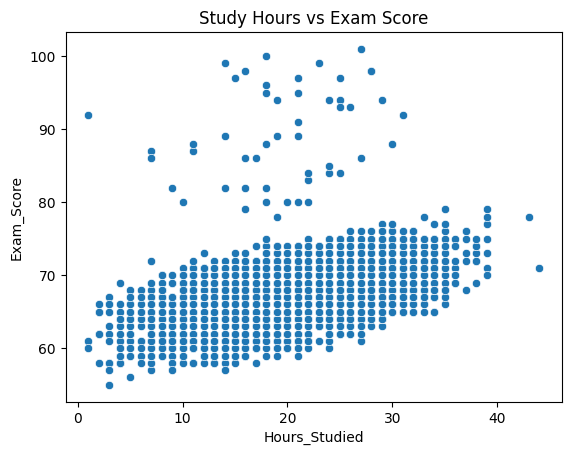

In [13]:
plt.figure()
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Study Hours vs Exam Score")
plt.show()


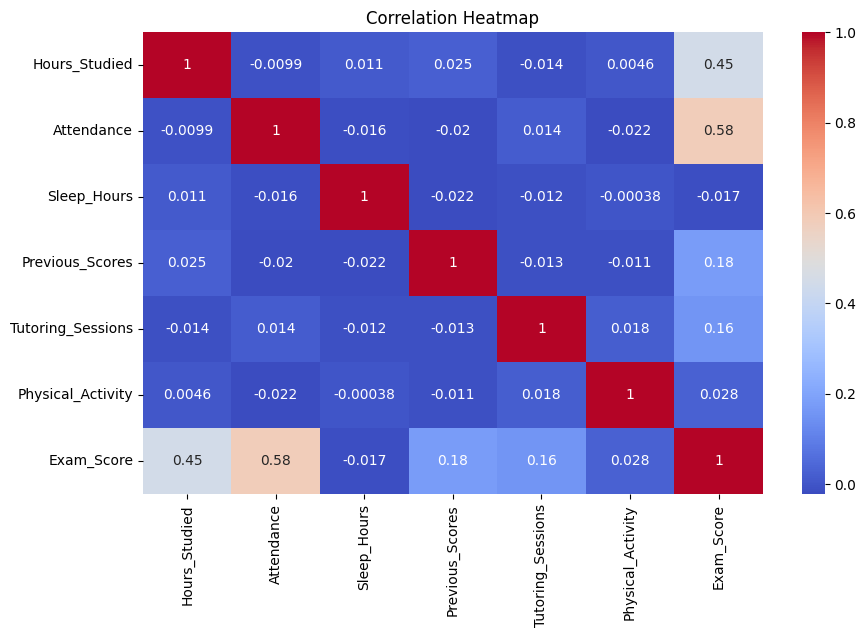

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [15]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [16]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = model.predict(X_test)


In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Train R2:", model.score(X_train, y_train))
print("Test R2:", model.score(X_test, y_test))


MSE: 3.2520812275898963
RMSE: 1.8033527740267283
R2 Score: 0.7699282240123634
Train R2: 0.7174533445509723
Test R2: 0.7699282240123634


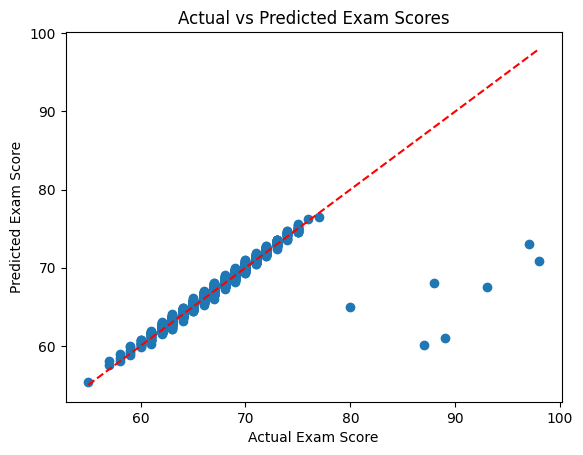

In [22]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [29]:
poly=PolynomialFeatures(degree=2, include_bias=False)
x_train_ploy=poly.fit_transform(X_train)
x_test_ploy=poly.transform(X_test)

In [30]:
poly_model=LinearRegression()
poly_model.fit(x_train_ploy,y_train)


LinearRegression()

In [31]:
y_pred_poly=poly_model.predict(x_test_ploy)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print("Polynomial R2:", r2_score(y_test, y_pred_poly))
print("Polynomial RMSE:", rmse_poly)



Polynomial R2: 0.7445417379779661
Polynomial RMSE: 1.900242365468763


In [37]:
corr = df.corr()['Exam_Score'].sort_values(ascending=False)
corr

,Exam_Score
Exam_Score,1.000000
Attendance,0.581072
Hours_Studied,0.445455
Previous_Scores,0.175079
Tutoring_Sessions,0.156525
Parental_Education_Level_Postgraduate,0.093764
Distance_from_Home_Near,0.084870
Peer_Influence_Positive,0.081217
Extracurricular_Activities_Yes,0.064382
Internet_Access_Yes,0.051475


In [38]:
strong_features = [
    'Hours_Studied',
    'Attendance',
    'Previous_Scores'
]

X_strong = df[strong_features]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_strong, y, test_size=0.2, random_state=42
)

model.fit(X_train_s, y_train_s)
y_pred_s = model.predict(X_test_s)

print("Strong Features R2:", r2_score(y_test_s, y_pred_s))


Strong Features R2: 0.6223383752199567


In [42]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

results = pd.DataFrame({
    'Model': ['Linear', 'Polynomial', 'Reduced Features'],
    'R2': [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test_s, y_pred_s)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        np.sqrt(mean_squared_error(y_test_s, y_pred_s))
    ]
})

results


,Model,R2,RMSE
0,Linear,0.769928,1.803353
1,Polynomial,0.744542,1.900242
2,Reduced Features,0.622338,2.310471
